# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Url From openweather for API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# Lists for storing values
city_name = []
country = []
latitude = []
longitude = []
max_temperature = []
humidity = []
wind_speed = []
cloudiness = []

In [6]:
# Loop through cities making the API call
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    # extracting data and cleaning data
# print cleaned data
    try:
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        latitude.append(response["coord"]["lat"])  
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        wind_speed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        print(f"{i}|{city}")
        i+=1
    except (KeyError):
        print("City name not found.")

1|ushuaia
2|brae
3|bambous virieux
4|bredasdorp
City name not found.
5|riverton
6|busselton
7|jamestown
8|yumen
9|ust-kuyga
10|souillac
11|kharan
City name not found.
12|mahebourg
13|wakkanai
14|vao
15|ancud
16|airai
17|thompson
18|gabrovo
19|hobart
City name not found.
20|kabare
21|vaini
22|luderitz
23|boguchany
24|ankang
25|georgetown
26|marystown
27|male
28|anupgarh
29|hermanus
30|meulaboh
31|beringovskiy
32|bethel
33|kodiak
34|hilo
35|rikitea
36|dir
37|angoche
38|tuatapere
39|limoges
40|kapaa
41|avarua
42|klaksvik
43|mataura
City name not found.
44|aswan
45|palestine
46|tiksi
47|victoria
48|atuona
49|marzuq
50|narsaq
51|saint-philippe
52|babaeski
53|awallan
54|sao joao da barra
55|tuktoyaktuk
56|salalah
City name not found.
57|fort nelson
58|port blair
59|carahue
60|pevek
61|sitka
62|punta arenas
63|urubamba
64|saldanha
65|ambilobe
66|ibia
67|punganuru
68|nieuw amsterdam
69|urumqi
70|new norfolk
71|acarau
72|billings
73|yulara
74|richards bay
75|inongo
76|butaritari
77|verkhoyansk


553|obo
City name not found.
554|almetyevsk
555|raudeberg
556|carutapera
557|pacific grove
558|olavarria
559|storforshei
560|mahanje
561|lembeni
562|upington
563|lavrentiya
564|lomovka
565|college
566|tecoanapa
567|muswellbrook
568|yangambi
569|svetlogorsk
City name not found.
570|krasnoarmeysk
571|korhogo
572|mareeba
City name not found.
573|moranbah
City name not found.
574|tezu
575|cienfuegos
576|sobolevo
577|rivne
578|teyateyaneng
579|winfield
580|watertown


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Turn appended lists into dictionary
weather_dict = {'City':city_name,
                'Country':country,
                'Lat':latitude,
                'Lng':longitude,
                'Max Temp':max_temperature,
                'Humidity':humidity,
                'Wind Speed':wind_speed,
                'Cloudiness':cloudiness,}

#Turn dictionary into dataframe
weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Country,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness
0,Ushuaia,AR,-54.80,-68.30,46.40,70,27.51,75
1,Brae,GB,60.40,-1.35,46.40,87,6.93,100
2,Bambous Virieux,MU,-20.34,57.76,78.80,78,8.05,40
3,Bredasdorp,ZA,-34.53,20.04,64.40,77,5.82,0
4,Riverton,US,40.52,-111.94,59.00,44,9.17,1
...,...,...,...,...,...,...,...,...
575,Sobolevo,RU,54.43,31.90,40.60,63,7.43,56
576,Rivne,UA,50.62,26.23,42.48,56,6.49,0
577,Teyateyaneng,LS,-29.15,27.75,56.50,43,2.53,64
578,Winfield,US,37.24,-97.00,57.20,32,7.00,40


In [27]:
weather_df.to_csv ("weather_df", index = None, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

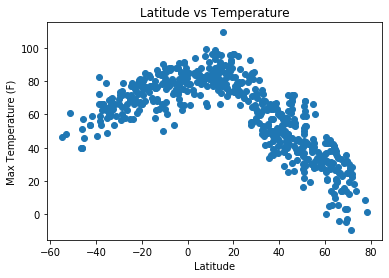

In [28]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs Temperature")
plt.show()

In [29]:
plt.savefig('Fig1.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
#This scatter plot is looking to see what the temperature is the more north and south of the equator you are. 
#The weather seems to increase the closer to the equator you are and then decrease dramatically the farther north of the equator.

#### Latitude vs. Humidity Plot

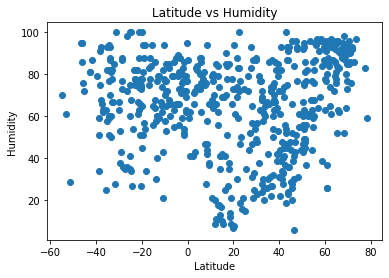

In [30]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.show()

In [31]:
plt.savefig('Fig2.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
#This scatter plot is comparing latitude of cities to humidty.
#The humidity of a city based on latitude seems to be random. 

#### Latitude vs. Cloudiness Plot

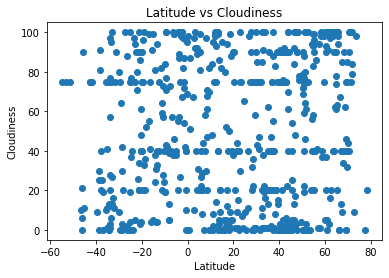

In [32]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.show()

In [33]:
plt.savefig('Fig3.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
#This scatter plot is looking at how cloudy a city is based on the latitude of it's coorindates. 
#The cloudiness of a city based on latitude seems to be random. 

#### Latitude vs. Wind Speed Plot

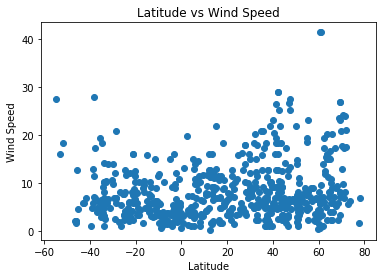

In [34]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.show()

In [35]:
plt.savefig('Fig4.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
#This scatter plot is looking at the wind speed of a particular city based on the latitude of it's coordinates. 
#Wind speed seems to stay pretty consistent by latitude sans a few outliers. One in particular is about 60 degrees north of the equator. 

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots


In [17]:
# Create Northern DataFrame
northern_hemisphere_df = weather_df[weather_df["Lat"] >= 0]
northern_hemisphere_df

,City,Country,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness
1,Brae,GB,60.40,-1.35,46.40,87,6.93,100
4,Riverton,US,40.52,-111.94,59.00,44,9.17,1
6,Jamestown,US,42.10,-79.24,37.40,69,28.86,90
7,Yumen,CN,40.28,97.20,43.59,22,20.45,3
8,Ust-Kuyga,RU,70.02,135.60,24.62,90,13.02,44
...,...,...,...,...,...,...,...,...
574,Cienfuegos,CU,22.15,-80.44,95.00,59,12.75,15
575,Sobolevo,RU,54.43,31.90,40.60,63,7.43,56
576,Rivne,UA,50.62,26.23,42.48,56,6.49,0
578,Winfield,US,37.24,-97.00,57.20,32,7.00,40


In [18]:
# Create Southern Hemisphere DataFrame
southern_hemisphere_df = weather_df[weather_df["Lat"] < 0]
southern_hemisphere_df

,City,Country,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloudiness
0,Ushuaia,AR,-54.80,-68.30,46.40,70,27.51,75
2,Bambous Virieux,MU,-20.34,57.76,78.80,78,8.05,40
3,Bredasdorp,ZA,-34.53,20.04,64.40,77,5.82,0
5,Busselton,AU,-33.65,115.33,69.01,50,14.16,75
9,Souillac,MU,-20.52,57.52,78.80,78,8.05,40
...,...,...,...,...,...,...,...,...
561,Upington,ZA,-28.45,21.26,78.80,36,6.93,20
566,Muswellbrook,AU,-32.27,150.90,53.53,85,6.64,11
571,Mareeba,AU,-17.00,145.43,73.40,83,1.77,99
572,Moranbah,AU,-22.00,148.05,67.62,82,4.23,71


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.884423024049503


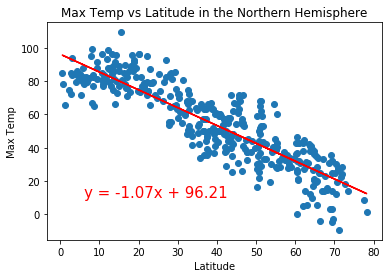

In [19]:
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Max Temp vs Latitude in the Northern Hemisphere")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7044078923108454


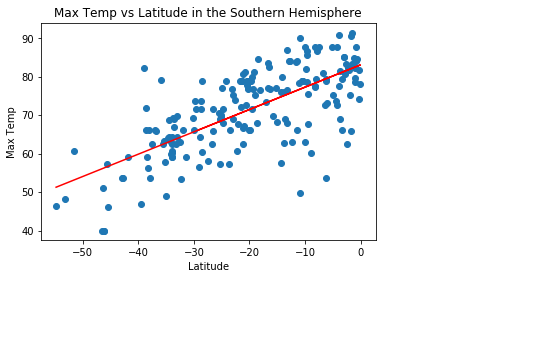

In [20]:
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Max Temp vs Latitude in the Southern Hemisphere")
print(f"The r-squared is: {rvalue}")
plt.show()

In [ ]:
#These regressions were seeing if there was any correlation between latitude and max temperature in both the southern and northern hempisheres.
#There is clearly a relationship between the two as the weather increases the closer you get to the equator and decreases the farther you are from the equator. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.32263771634768135


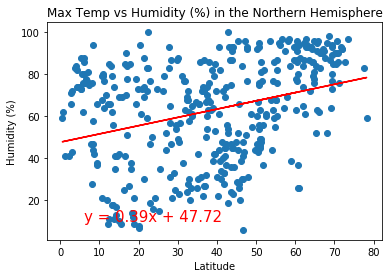

In [21]:
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Max Temp vs Humidity (%) in the Northern Hemisphere")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0301706508810672


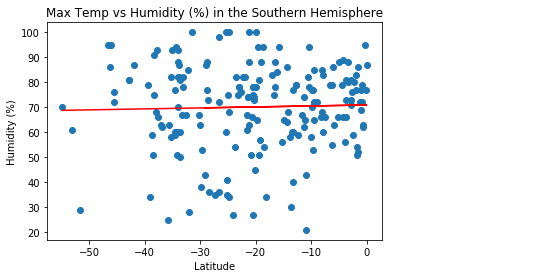

In [22]:
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Max Temp vs Humidity (%) in the Southern Hemisphere")
print(f"The r-squared is: {rvalue}")
plt.show()

In [ ]:
#These regressions were seeing if there was any correlation between latitude and humidity in both the southern and northern hempisheres.
#There seems to be a relationship between latitude and humidity when you are above the equator, but not when you are below. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16879252550676124


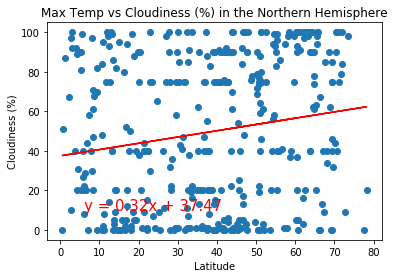

In [23]:
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Max Temp vs Cloudiness (%) in the Northern Hemisphere")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2484809634020189


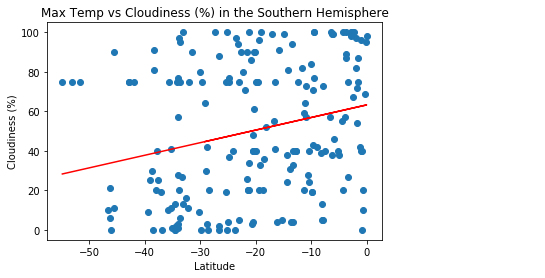

In [24]:
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Max Temp vs Cloudiness (%) in the Southern Hemisphere")
print(f"The r-squared is: {rvalue}")
plt.show()

In [ ]:
#These regressions were seeing if there was any correlation between latitude and cloudiness in both the southern and northern hempisheres.
#There seems to be a small relationship between latitude and cloudiness in both the northern and southern hemispheres. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.16394292832608184


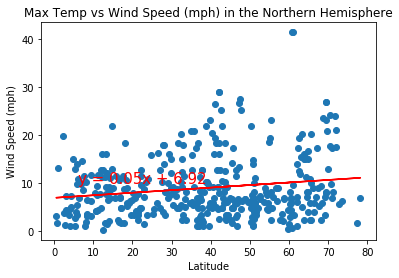

In [25]:
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Max Temp vs Wind Speed (mph) in the Northern Hemisphere")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.29436351770505215


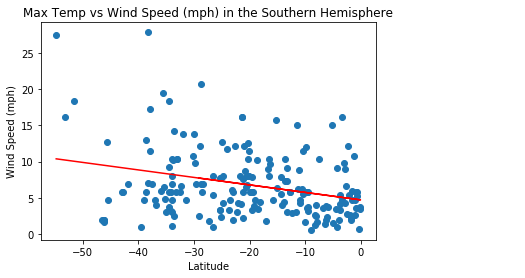

In [26]:
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Max Temp vs Wind Speed (mph) in the Southern Hemisphere")
print(f"The r-squared is: {rvalue}")
plt.show()

In [ ]:
#These regressions were seeing if there was any correlation between latitude and wind speedin both the southern and northern hempisheres.
#Wind speed tends to decrease the closer you get to the equator when in the southern hemisphere, but there doesn't seem to be much of a relationship in the northern hemisphere. 